In [2]:
# https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
# https://www.cdc.gov/nchs/data/databriefs/db427-tables.pdf#4 - 5% 
# https://www.heartandstroke.ca/stroke/what-is-stroke
# https://www.healthline.com/health/stroke-vs-heart-attack
# print(sklearn.metrics.classification_report(y_test, y_pred))

In [3]:
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, accuracy_score, roc_auc_score
from sklearn.metrics import f1_score, roc_curve, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [7]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
df.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [10]:
# drop the row with "other" in gender as it is only one row
df = df[df.gender != 'Other']
df.gender.value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   gender             4908 non-null   object 
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_married       4908 non-null   object 
 6   work_type          4908 non-null   object 
 7   Residence_type     4908 non-null   object 
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     4908 non-null   object 
 11  stroke             4908 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.5+ KB


In [12]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4903,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4904,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4905,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4906,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
4907,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [15]:
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4908 non-null   int64  
 1   age                             4908 non-null   float64
 2   hypertension                    4908 non-null   int64  
 3   heart_disease                   4908 non-null   int64  
 4   avg_glucose_level               4908 non-null   float64
 5   bmi                             4908 non-null   float64
 6   stroke                          4908 non-null   int64  
 7   gender_Male                     4908 non-null   uint8  
 8   ever_married_Yes                4908 non-null   uint8  
 9   work_type_Never_worked          4908 non-null   uint8  
 10  work_type_Private               4908 non-null   uint8  
 11  work_type_Self-employed         4908 non-null   uint8  
 12  work_type_children              49

In [16]:
X = df.drop(columns=['stroke'], axis=1)
y = df.stroke

# X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.15, random_state=42, stratify=y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2, stratify=y_train)

# stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)


In [17]:
y_train.value_counts()

0    3759
1     167
Name: stroke, dtype: int64

In [18]:
import imblearn.over_sampling

n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)

# create 4x as many positive samples
ratio = {1 : n_pos * 4, 0 : n_neg}

# randomly oversample positives
ROS =imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio,random_state=42)
X_tr_rs, y_tr_rs = ROS.fit_resample(X_train, y_train)


## Logistic Regression

In [19]:
lm1 = LogisticRegression(C=1000, max_iter=1000) # setting C very high essentially removes regularization
lm1.fit(X_tr_rs, y_tr_rs)

LogisticRegression(C=1000, max_iter=1000)

In [20]:
train_score = lm1.score(X_train, y_train)
# val_score = lm1.score(X_val, y_val)
test_score = lm1.score(X_test, y_test)

print("The score for logistic regression is ")
print("Train set: {:6.2f}%".format(100*train_score))
# print("Validation set: {:6.2f}%".format(100*val_score))
print("Test set: {:6.2f}%".format(100*test_score))

y_pred = lm1.predict(X_test)

print("\n")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")
print(f"Log_loss: {log_loss(y_test, y_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, lm1.predict_proba(X_test)[:,1])}")

The score for logistic regression is 
Train set:  93.22%
Test set:  92.97%


Precision: 0.13513513513513514
Recall: 0.11904761904761904
F1: 0.12658227848101267
Log_loss: 2.4268850899863583
ROC AUC: 0.7141337386018237


In [21]:
lm1 = LogisticRegression(C=100, solver='liblinear') # setting C very high essentially removes regularization
lm1.fit(X_tr_rs, y_tr_rs)

y_pred = lm1.predict(X_test)

print("\n")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")
print(f"Log_loss: {log_loss(y_test, y_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, lm1.predict_proba(X_test)[:,1])}")



Precision: 0.125
Recall: 0.09523809523809523
F1: 0.1081081081081081
Log_loss: 2.321366222802598
ROC AUC: 0.7121580547112462


In [22]:
lr = LogisticRegression(C=100, solver='liblinear') 
lr_balanced = LogisticRegression(class_weight='balanced', solver='liblinear')
lr_4x = LogisticRegression(C=100, class_weight={1 : 4, 0 : 1}, solver='liblinear')
lr_6x = LogisticRegression(C=100, class_weight={1 : 6, 0 : 1}, solver='liblinear')
lr_8x = LogisticRegression(C=100, class_weight={1 : 8, 0 : 1}, solver='liblinear')

# fit on oversampled data

lr.fit(X_tr_rs, y_tr_rs)
print('Normal Logistic Regression - Test F1: %.3f, Test AUC: %.3f, Log loss: %.3f' % \
      (f1_score(y_test, lr.predict(X_test)), roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]), log_loss(y_test, lr.predict(X_test))))

print('LogisticRegression - ')
print(f"Precision: {precision_score(y_test, lr.predict(X_test))}")
print(f"Recall: {recall_score(y_test, lr.predict(X_test))}")

lr_balanced.fit(X_tr_rs, y_tr_rs)
print('Balanced class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f, Log loss: %.3f' % \
      (f1_score(y_test, lr_balanced.predict(X_test)), roc_auc_score(y_test, lr_balanced.predict_proba(X_test)[:,1]), log_loss(y_test, lr_balanced.predict(X_test))))

lr_4x.fit(X_tr_rs, y_tr_rs)
print('4:1 class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f, Log loss: %.3f' % \
      (f1_score(y_test, lr_4x.predict(X_test)), roc_auc_score(y_test, lr_4x.predict_proba(X_test)[:,1]), log_loss(y_test, lr_4x.predict(X_test))))
      
lr_6x.fit(X_tr_rs, y_tr_rs)
print('6:1 class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f, Log loss: %.3f' % \
      (f1_score(y_test, lr_6x.predict(X_test)), roc_auc_score(y_test, lr_6x.predict_proba(X_test)[:,1]), log_loss(y_test, lr_6x.predict(X_test))))
        
lr_8x.fit(X_tr_rs, y_tr_rs)
print('8:1 class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f, Log loss: %.3f' % \
      (f1_score(y_test, lr_8x.predict(X_test)), roc_auc_score(y_test, lr_8x.predict_proba(X_test)[:,1]), log_loss(y_test, lr_8x.predict(X_test))))
          
      

Normal Logistic Regression - Test F1: 0.108, Test AUC: 0.712, Log loss: 2.321
LogisticRegression - 
Precision: 0.125
Recall: 0.09523809523809523
Balanced class weights Logistic Regression Test F1: 0.197, Test AUC: 0.802, Log loss: 8.617
4:1 class weights Logistic Regression Test F1: 0.157, Test AUC: 0.782, Log loss: 7.562
6:1 class weights Logistic Regression Test F1: 0.193, Test AUC: 0.802, Log loss: 8.828
8:1 class weights Logistic Regression Test F1: 0.178, Test AUC: 0.802, Log loss: 11.079


In [23]:
# fit on train data, not oversampled data

lr.fit(X_train, y_train)
print('Normal Logistic Regression - Test F1: %.3f, Test AUC: %.3f, Log loss: %.3f' % \
      (f1_score(y_test, lr.predict(X_test)), roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]), log_loss(y_test, lr.predict(X_test))))

lr_balanced.fit(X_train, y_train)
print('Balanced class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f, Log loss: %.3f' % \
      (f1_score(y_test, lr_balanced.predict(X_test)), roc_auc_score(y_test, lr_balanced.predict_proba(X_test)[:,1]), log_loss(y_test, lr_balanced.predict(X_test))))

lr_4x.fit(X_train, y_train)
print('4:1 class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f, Log loss: %.3f' % \
      (f1_score(y_test, lr_4x.predict(X_test)), roc_auc_score(y_test, lr_4x.predict_proba(X_test)[:,1]), log_loss(y_test, lr_4x.predict(X_test))))
print(f"Precision: {precision_score(y_test, lr_4x.predict(X_test))}")
print(f"Recall: {recall_score(y_test, lr_4x.predict(X_test))}")

lr_6x.fit(X_train, y_train)
print('6:1 class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f, Log loss: %.3f' % \
      (f1_score(y_test, lr_6x.predict(X_test)), roc_auc_score(y_test, lr_6x.predict_proba(X_test)[:,1]), log_loss(y_test, lr_6x.predict(X_test))))
print(f"Precision: {precision_score(y_test, lr_6x.predict(X_test))}")
print(f"Recall: {recall_score(y_test, lr_6x.predict(X_test))}")    

lr_8x.fit(X_train, y_train)
print('8:1 class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f, Log loss: %.3f' % \
      (f1_score(y_test, lr_8x.predict(X_test)), roc_auc_score(y_test, lr_8x.predict_proba(X_test)[:,1]), log_loss(y_test, lr_8x.predict(X_test))))
print(f"Precision: {precision_score(y_test, lr_8x.predict(X_test))}")
print(f"Recall: {recall_score(y_test, lr_8x.predict(X_test))}")    

      

Normal Logistic Regression - Test F1: 0.000, Test AUC: 0.660, Log loss: 1.548
Balanced class weights Logistic Regression Test F1: 0.193, Test AUC: 0.803, Log loss: 8.547
4:1 class weights Logistic Regression Test F1: 0.165, Test AUC: 0.719, Log loss: 2.497
Precision: 0.16279069767441862
Recall: 0.16666666666666666
6:1 class weights Logistic Regression Test F1: 0.215, Test AUC: 0.805, Log loss: 3.588
Precision: 0.1590909090909091
Recall: 0.3333333333333333
8:1 class weights Logistic Regression Test F1: 0.200, Test AUC: 0.776, Log loss: 4.502
Precision: 0.13559322033898305
Recall: 0.38095238095238093


## KNN Classifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tr_rs, y_tr_rs)

y_pred = knn.predict(X_test)

print(f"Accuracy Score : {accuracy_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")
print(f"Log_loss: {log_loss(y_test, y_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])}")

Accuracy Score : 0.890020366598778
F1: 0.06896551724137931
Log_loss: 3.798618963819214
ROC AUC: 0.48957700101317125


In [25]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_tr_rs, y_tr_rs)

y_pred = knn.predict(X_test)

print(f"Accuracy Score : {accuracy_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")
print(f"Log_loss: {log_loss(y_test, y_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])}")

Accuracy Score : 0.9093686354378818
F1: 0.04301075268817204
Log_loss: 3.1303363334227403
ROC AUC: 0.5376266464032421


In [26]:
print('f1-macro', f1_score(y_test, y_pred, average='macro'))
print('f1-micro', f1_score(y_test, y_pred, average='micro'))
print('f1-weighted', f1_score(y_test, y_pred, average='weighted'))
print('f1', f1_score(y_test, y_pred, average=None))
print(f"Log_loss: {log_loss(y_test, y_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])}")

f1-macro 0.4977213036556841
f1-micro 0.9093686354378818
f1-weighted 0.9135360437461381
f1 [0.95243185 0.04301075]
Log_loss: 3.1303363334227403
ROC AUC: 0.5376266464032421


## DecisionTree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4,criterion="entropy")
dt.fit(X_tr_rs,y_tr_rs)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [28]:
y_pred = dt.predict(X_test)

print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")
print(f"Log_loss: {log_loss(y_test, y_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, lm1.predict_proba(X_test)[:,1])}")

Precision: 0.07142857142857142
Recall: 0.07142857142857142
F1: 0.07142857142857142
Log_loss: 2.7434376202676285
ROC AUC: 0.7121580547112462


## Random Forest with Cross-Fold Validation

In [29]:
# class_weight={0:1,1:3}, best log_loss score
rfc = RandomForestClassifier(n_jobs=-1 ,n_estimators=200, oob_score = True, class_weight={0:1,1:3}) 

param_grid = { 
    'n_estimators': [100, 200],
    'max_depth': [2,4,8],
    'max_features': ['auto', 'sqrt', 'log2']   
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='neg_log_loss')
CV_rfc.fit(X_tr_rs, y_tr_rs)
print(CV_rfc.best_params_)

print('Best score of neg_log_loss', CV_rfc.best_score_)

y_pred_rfc = CV_rfc.predict(X_test)

print("Random Forest Classifier with CV -")
print(f"Precision: {precision_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"Recall: {recall_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"F1: {f1_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"ROC AUC: {roc_auc_score(y_test, CV_rfc.predict_proba(X_test)[:,1])}")

{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
Best score of neg_log_loss -0.23077199509475518
Random Forest Classifier with CV -
Precision: 0.16129032258064516
Recall: 0.23809523809523808
F1: 0.1923076923076923
ROC AUC: 0.7804204660587639


In [30]:
# class_weight={0:1,1:4})

rfc = RandomForestClassifier(n_jobs=-1 ,n_estimators=200, oob_score = True, class_weight={0:1,1:4}) 

param_grid = { 
    'n_estimators': [100, 200],
    'max_depth': [2,4,8],
    'max_features': ['auto', 'sqrt', 'log2']   
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='neg_log_loss')
CV_rfc.fit(X_tr_rs, y_tr_rs)
print(CV_rfc.best_params_)

print('Best score of neg_log_loss', CV_rfc.best_score_)

y_pred_rfc = CV_rfc.predict(X_test)

print("Random Forest Classifier with CV -")
print(f"Precision: {precision_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"Recall: {recall_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"F1: {f1_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"ROC AUC: {roc_auc_score(y_test, CV_rfc.predict_proba(X_test)[:,1])}")

{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
Best score of neg_log_loss -0.2493425611428997
Random Forest Classifier with CV -
Precision: 0.15151515151515152
Recall: 0.35714285714285715
F1: 0.21276595744680848
ROC AUC: 0.7809270516717325


### Best model parameters

In [31]:
# Best model parameters, best auc score and recall score
# class_weight={0:1,1:5}), n_estimators=200

rfc = RandomForestClassifier(n_jobs=-1 ,n_estimators=200, oob_score = True, class_weight={0:1,1:5}) 

param_grid = { 
    'n_estimators': [100, 200],
    'max_depth': [2,4,8],
    'max_features': ['auto', 'sqrt', 'log2']   
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='neg_log_loss')
CV_rfc.fit(X_tr_rs, y_tr_rs)
print(CV_rfc.best_params_)

print('Best score of neg_log_loss', CV_rfc.best_score_)

y_pred_rfc = CV_rfc.predict(X_test)

print("Random Forest Classifier with CV -")
print(f"Precision: {precision_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"Recall: {recall_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"F1: {f1_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"ROC AUC: {roc_auc_score(y_test, CV_rfc.predict_proba(X_test)[:,1])}")

{'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}
Best score of neg_log_loss -0.2676843882267005
Random Forest Classifier with CV -
Precision: 0.12857142857142856
Recall: 0.42857142857142855
F1: 0.19780219780219777
ROC AUC: 0.7833586626139817


In [32]:
# class_weight={0:1,1:5}, n_estimators=300

rfc = RandomForestClassifier(n_jobs=-1 ,n_estimators=300, oob_score = True, class_weight={0:1,1:5}) 

param_grid = { 
    'n_estimators': [100, 200],
    'max_depth': [2,4,8],
    'max_features': ['auto', 'sqrt', 'log2']   
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='neg_log_loss')
CV_rfc.fit(X_tr_rs, y_tr_rs)
print(CV_rfc.best_params_)

print('Best score of neg_log_loss', CV_rfc.best_score_)

y_pred_rfc = CV_rfc.predict(X_test)

print("Random Forest Classifier with CV -")
print(f"Precision: {precision_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"Recall: {recall_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"F1: {f1_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"ROC AUC: {roc_auc_score(y_test, CV_rfc.predict_proba(X_test)[:,1])}")

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Best score of neg_log_loss -0.26729820002018906
Random Forest Classifier with CV -
Precision: 0.13333333333333333
Recall: 0.42857142857142855
F1: 0.20338983050847456
ROC AUC: 0.7861195542046606


In [33]:
# class_weight={0:1,1:6}, n_estimators=200

rfc = RandomForestClassifier(n_jobs=-1 ,n_estimators=200, oob_score = True, class_weight={0:1,1:6}) 

param_grid = { 
    'n_estimators': [100, 200],
    'max_depth': [2,4,8],
    'max_features': ['auto', 'sqrt', 'log2']   
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='neg_log_loss')
CV_rfc.fit(X_tr_rs, y_tr_rs)
print(CV_rfc.best_params_)

print('Best score of neg_log_loss', CV_rfc.best_score_)

y_pred_rfc = CV_rfc.predict(X_test)

print("Random Forest Classifier with CV -")
print(f"Precision: {precision_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"Recall: {recall_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"F1: {f1_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"ROC AUC: {roc_auc_score(y_test, CV_rfc.predict_proba(X_test)[:,1])}")

{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}
Best score of neg_log_loss -0.2844313535614256
Random Forest Classifier with CV -
Precision: 0.12222222222222222
Recall: 0.5238095238095238
F1: 0.19819819819819817
ROC AUC: 0.7908308004052684


In [34]:
# sklearn.metrics.SCORERS.keys()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

rfc = RandomForestClassifier(n_jobs=-1 ,n_estimators=200, oob_score = True) 
rfc.fit(X_tr_rs, y_tr_rs)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
auc_scores = cross_val_score(rfc, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
precision_scores = cross_val_score(rfc, X_test, y_test, scoring='precision', cv=cv, n_jobs=-1)
recall_scores = cross_val_score(rfc, X_test, y_test, scoring='recall', cv=cv, n_jobs=-1)
logloss_scores = cross_val_score(rfc, X_test, y_test, scoring='neg_log_loss', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(auc_scores))
print('Mean logloss: %.3f' % mean(logloss_scores))
print('Mean precision: %.3f' % mean(precision_scores))
print('Mean recall: %.3f' % mean(recall_scores))

Mean ROC AUC: 0.719
Mean logloss: -0.227
Mean precision: 0.100
Mean recall: 0.022


In [35]:
from sklearn.model_selection import StratifiedKFold

rfc = RandomForestClassifier(n_jobs=-1 ,n_estimators=200, oob_score = True) 
rfc.fit(X_tr_rs, y_tr_rs)

cv = StratifiedKFold(n_splits=4)
# evaluate model
auc_scores = cross_val_score(rfc, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
logloss_scores = cross_val_score(rfc, X_test, y_test, scoring='neg_log_loss', cv=cv, n_jobs=-1)
precision_scores = cross_val_score(rfc, X_test, y_test, scoring='precision', cv=cv, n_jobs=-1)
recall_scores = cross_val_score(rfc, X_test, y_test, scoring='recall', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(auc_scores))
print('Mean logloss: %.3f' % mean(logloss_scores))
print('Mean precision: %.3f' % mean(precision_scores))
print('Mean recall: %.3f' % mean(recall_scores))

Mean ROC AUC: 0.737
Mean logloss: -0.222
Mean precision: 0.250
Mean recall: 0.023


## XGBoost

In [36]:
gbm = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective="binary:logistic",  # Other options: https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(X_tr_rs,y_tr_rs),(X_test,y_test)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    X_tr_rs, y_tr_rs, 
                    eval_set=eval_set,
                    eval_metric='auc',
                    early_stopping_rounds=20,
                    #verbose=True      #gives output log as below - deprecated
                   )

[0]	validation_0-auc:0.85007	validation_1-auc:0.76356
[1]	validation_0-auc:0.86098	validation_1-auc:0.75557
[2]	validation_0-auc:0.85842	validation_1-auc:0.76550
[3]	validation_0-auc:0.87205	validation_1-auc:0.77686
[4]	validation_0-auc:0.87423	validation_1-auc:0.77608
[5]	validation_0-auc:0.87434	validation_1-auc:0.76824
[6]	validation_0-auc:0.87478	validation_1-auc:0.76306
[7]	validation_0-auc:0.87802	validation_1-auc:0.76773
[8]	validation_0-auc:0.88447	validation_1-auc:0.77757
[9]	validation_0-auc:0.88369	validation_1-auc:0.77756
[10]	validation_0-auc:0.88685	validation_1-auc:0.78688
[11]	validation_0-auc:0.88900	validation_1-auc:0.78579
[12]	validation_0-auc:0.88948	validation_1-auc:0.78746
[13]	validation_0-auc:0.88989	validation_1-auc:0.79067
[14]	validation_0-auc:0.89068	validation_1-auc:0.79080
[15]	validation_0-auc:0.89210	validation_1-auc:0.79320
[16]	validation_0-auc:0.89425	validation_1-auc:0.79244
[17]	validation_0-auc:0.89460	validation_1-auc:0.79255
[18]	validation_0-au

/Users/bsameera/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[59]	validation_0-auc:0.92670	validation_1-auc:0.80122
[60]	validation_0-auc:0.92737	validation_1-auc:0.80036
[61]	validation_0-auc:0.92758	validation_1-auc:0.80033
[62]	validation_0-auc:0.92770	validation_1-auc:0.80018
[63]	validation_0-auc:0.92794	validation_1-auc:0.80013
[64]	validation_0-auc:0.92884	validation_1-auc:0.80063
[65]	validation_0-auc:0.92938	validation_1-auc:0.80124
[66]	validation_0-auc:0.92929	validation_1-auc:0.80160
[67]	validation_0-auc:0.92953	validation_1-auc:0.80142
[68]	validation_0-auc:0.92993	validation_1-auc:0.80063
[69]	validation_0-auc:0.93097	validation_1-auc:0.80109
[70]	validation_0-auc:0.93313	validation_1-auc:0.80277
[71]	validation_0-auc:0.93329	validation_1-auc:0.80290
[72]	validation_0-auc:0.93362	validation_1-auc:0.80368
[73]	validation_0-auc:0.93387	validation_1-auc:0.80381
[74]	validation_0-auc:0.93416	validation_1-auc:0.80379
[75]	validation_0-auc:0.93562	validation_1-auc:0.80331
[76]	validation_0-auc:0.93588	validation_1-auc:0.80356
[77]	valid

In [37]:
print('AUC : ', roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1]))
print('Log_loss: ', log_loss(y_test, gbm.predict(X_test)))
print('Precision : ', precision_score(y_test, gbm.predict(X_test)))
print('Recall : ', recall_score(y_test, gbm.predict(X_test)))
print('f1_score : ', f1_score(y_test, gbm.predict(X_test)))

AUC :  0.8058510638297872
Log_loss:  1.8992923825755605
Precision :  0.125
Recall :  0.047619047619047616
f1_score :  0.06896551724137931


In [38]:
# same model as above, but eval_metric='logloss'

gbm = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective="binary:logistic",  # Other options: https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(X_tr_rs,y_tr_rs),(X_test,y_test)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    X_tr_rs, y_tr_rs, 
                    eval_set=eval_set,
                    eval_metric='logloss',
                    early_stopping_rounds=20,
                    #verbose=True      #gives output log as below - deprecated
                   )

print('AUC : ', roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1]))
print('Log_loss: ', log_loss(y_test, gbm.predict(X_test)))
print('Precision : ', precision_score(y_test, gbm.predict(X_test)))
print('Recall : ', recall_score(y_test, gbm.predict(X_test)))
print('f1_score : ', f1_score(y_test, gbm.predict(X_test)))

[0]	validation_0-logloss:0.63507	validation_1-logloss:0.62581
[1]	validation_0-logloss:0.59053	validation_1-logloss:0.57176
[2]	validation_0-logloss:0.55321	validation_1-logloss:0.52537
[3]	validation_0-logloss:0.51803	validation_1-logloss:0.48472
[4]	validation_0-logloss:0.48808	validation_1-logloss:0.45029
[5]	validation_0-logloss:0.46530	validation_1-logloss:0.42137
[6]	validation_0-logloss:0.44630	validation_1-logloss:0.39630
[7]	validation_0-logloss:0.42645	validation_1-logloss:0.37360
[8]	validation_0-logloss:0.40929	validation_1-logloss:0.35322
[9]	validation_0-logloss:0.39633	validation_1-logloss:0.33653
[10]	validation_0-logloss:0.38279	validation_1-logloss:0.32061
[11]	validation_0-logloss:0.37064	validation_1-logloss:0.30707
[12]	validation_0-logloss:0.36007	validation_1-logloss:0.29512
[13]	validation_0-logloss:0.35069	validation_1-logloss:0.28424
[14]	validation_0-logloss:0.34239	validation_1-logloss:0.27492
[15]	validation_0-logloss:0.33498	validation_1-logloss:0.26630
[1

/Users/bsameera/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[69]	validation_0-logloss:0.24189	validation_1-logloss:0.19230
[70]	validation_0-logloss:0.24015	validation_1-logloss:0.19200
[71]	validation_0-logloss:0.23984	validation_1-logloss:0.19187
[72]	validation_0-logloss:0.23919	validation_1-logloss:0.19176
[73]	validation_0-logloss:0.23877	validation_1-logloss:0.19180
[74]	validation_0-logloss:0.23833	validation_1-logloss:0.19172
[75]	validation_0-logloss:0.23704	validation_1-logloss:0.19188
[76]	validation_0-logloss:0.23660	validation_1-logloss:0.19169
[77]	validation_0-logloss:0.23567	validation_1-logloss:0.19147
[78]	validation_0-logloss:0.23538	validation_1-logloss:0.19145
[79]	validation_0-logloss:0.23409	validation_1-logloss:0.19136
[80]	validation_0-logloss:0.23351	validation_1-logloss:0.19131
[81]	validation_0-logloss:0.23230	validation_1-logloss:0.19113
[82]	validation_0-logloss:0.23192	validation_1-logloss:0.19103
[83]	validation_0-logloss:0.23095	validation_1-logloss:0.19148
[84]	validation_0-logloss:0.22947	validation_1-logloss:

In [52]:
gbm = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective="binary:logistic",  # Other options: https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8,
                       scale_pos_weight=3,
                       use_label_encoder=False
                      )
gbm.fit( 
        X_tr_rs, y_tr_rs, 
        eval_set=eval_set,
        eval_metric='auc',
        early_stopping_rounds=20,
        #verbose=True     #gives output log as below - deprecated
       )



[0]	validation_0-auc:0.85542	validation_1-auc:0.76355
[1]	validation_0-auc:0.86730	validation_1-auc:0.75580
[2]	validation_0-auc:0.86200	validation_1-auc:0.75147
[3]	validation_0-auc:0.87587	validation_1-auc:0.76887
[4]	validation_0-auc:0.87516	validation_1-auc:0.77150
[5]	validation_0-auc:0.87501	validation_1-auc:0.77157
[6]	validation_0-auc:0.87654	validation_1-auc:0.77024
[7]	validation_0-auc:0.88039	validation_1-auc:0.77359
[8]	validation_0-auc:0.88234	validation_1-auc:0.77463
[9]	validation_0-auc:0.88279	validation_1-auc:0.77375
[10]	validation_0-auc:0.88596	validation_1-auc:0.77712
[11]	validation_0-auc:0.88645	validation_1-auc:0.77991
[12]	validation_0-auc:0.88720	validation_1-auc:0.78257
[13]	validation_0-auc:0.88800	validation_1-auc:0.78685
[14]	validation_0-auc:0.88850	validation_1-auc:0.78991
[15]	validation_0-auc:0.88887	validation_1-auc:0.79089
[16]	validation_0-auc:0.89056	validation_1-auc:0.79357
[17]	validation_0-auc:0.89175	validation_1-auc:0.79497
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30000, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [53]:
print('AUC : ', roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1]))
print('Log_loss: ', log_loss(y_test, gbm.predict(X_test)))
print('Precision : ', precision_score(y_test, gbm.predict(X_test)))
print('Recall : ', recall_score(y_test, gbm.predict(X_test)))
print('f1_score : ', f1_score(y_test, gbm.predict(X_test)))

AUC :  0.8041793313069909
Log_loss:  6.120030784845936
Precision :  0.125
Recall :  0.5238095238095238
f1_score :  0.2018348623853211


In [54]:
#  criterion='conf', conf=[0.95,0.95], - warning - { conf, criterion } might not be used

gbm = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_delta_step = 1,
                       max_depth=3,
                       objective="binary:logistic",  # Other options: https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters
                       learning_rate=.2, 
                       subsample=0.8,
                       min_child_weight=1,
                       colsample_bytree=.8,
                       use_label_encoder=False
                      )
gbm.fit( 
        X_tr_rs, y_tr_rs, 
        eval_set=eval_set,
        eval_metric='auc',
        early_stopping_rounds=20
        #verbose=True #gives output log as below
       )

print('AUC : ', roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1]))
print('Log_loss: ', log_loss(y_test, gbm.predict(X_test)))
print('Precision : ', precision_score(y_test, gbm.predict(X_test)))
print('Recall : ', recall_score(y_test, gbm.predict(X_test)))
print('f1_score : ', f1_score(y_test, gbm.predict(X_test)))


[0]	validation_0-auc:0.76762	validation_1-auc:0.66422
[1]	validation_0-auc:0.80165	validation_1-auc:0.67923
[2]	validation_0-auc:0.81733	validation_1-auc:0.68511
[3]	validation_0-auc:0.82143	validation_1-auc:0.68703
[4]	validation_0-auc:0.87297	validation_1-auc:0.75222
[5]	validation_0-auc:0.87741	validation_1-auc:0.76638
[6]	validation_0-auc:0.88008	validation_1-auc:0.77924
[7]	validation_0-auc:0.88887	validation_1-auc:0.78193
[8]	validation_0-auc:0.89389	validation_1-auc:0.79126
[9]	validation_0-auc:0.89384	validation_1-auc:0.78779
[10]	validation_0-auc:0.89396	validation_1-auc:0.78195
[11]	validation_0-auc:0.89601	validation_1-auc:0.78699
[12]	validation_0-auc:0.89869	validation_1-auc:0.79599
[13]	validation_0-auc:0.89907	validation_1-auc:0.78770
[14]	validation_0-auc:0.89949	validation_1-auc:0.78411
[15]	validation_0-auc:0.90174	validation_1-auc:0.78649
[16]	validation_0-auc:0.90417	validation_1-auc:0.79359
[17]	validation_0-auc:0.90695	validation_1-auc:0.79587
[18]	validation_0-au

In [55]:
# learning_rate=.3, max_depth=5, scale_pos_weight=2, min_child_weight=2, subsample=1, gamma=0
# max_depth=5, min_child_weight=2  reduced the precision 
gbm = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_delta_step = 1,
                       max_depth=4,
                       objective="binary:logistic",  # Other options: https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters
                       learning_rate=.3, 
                       subsample=1,
                       min_child_weight=2,
                       colsample_bytree=0.8,
                       use_label_encoder=False,
                       scale_pos_weight=2,
                       gamma=0
#                        num_boost_round=100
                      )
gbm.fit( 
        X_tr_rs, y_tr_rs, 
        eval_set=eval_set,
        eval_metric='auc',
        early_stopping_rounds=20
        #verbose=True #gives output log as below
       )

print('AUC : ', roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1]))
print('Log_loss: ', log_loss(y_test, gbm.predict(X_test)))
print('Precision : ', precision_score(y_test, gbm.predict(X_test)))
print('Recall : ', recall_score(y_test, gbm.predict(X_test)))
print('f1_score : ', f1_score(y_test, gbm.predict(X_test)))


[0]	validation_0-auc:0.80136	validation_1-auc:0.68341
[1]	validation_0-auc:0.83341	validation_1-auc:0.70091
[2]	validation_0-auc:0.87848	validation_1-auc:0.73694
[3]	validation_0-auc:0.90393	validation_1-auc:0.77004
[4]	validation_0-auc:0.91202	validation_1-auc:0.77333
[5]	validation_0-auc:0.91612	validation_1-auc:0.77292
[6]	validation_0-auc:0.91960	validation_1-auc:0.77798
[7]	validation_0-auc:0.92540	validation_1-auc:0.78766
[8]	validation_0-auc:0.93164	validation_1-auc:0.79433
[9]	validation_0-auc:0.93699	validation_1-auc:0.79184
[10]	validation_0-auc:0.93964	validation_1-auc:0.79572
[11]	validation_0-auc:0.94137	validation_1-auc:0.79799
[12]	validation_0-auc:0.94215	validation_1-auc:0.79825
[13]	validation_0-auc:0.94648	validation_1-auc:0.79904
[14]	validation_0-auc:0.94918	validation_1-auc:0.79967
[15]	validation_0-auc:0.94990	validation_1-auc:0.80122
[16]	validation_0-auc:0.95098	validation_1-auc:0.80101
[17]	validation_0-auc:0.95185	validation_1-auc:0.80223
[18]	validation_0-au

## confusion matrix, threshold adjustment for model with optimal AUC - Logistic Regression 

In [59]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['no_stroke', 'stroke'],
           yticklabels=['no_stroke', 'stroke']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

In [60]:
lr_6x = LogisticRegression(C=100, class_weight={1 : 6, 0 : 1}, solver='liblinear') 
lr_6x.fit(X_train, y_train)

LogisticRegression(C=100, class_weight={0: 1, 1: 6}, solver='liblinear')

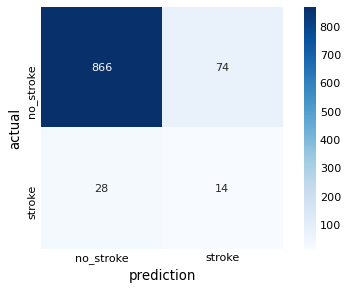

In [61]:
make_confusion_matrix(lr_6x)

In [62]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(lr_6x, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [63]:
# using the default threshold of 0.5, which is what vanilla predict does
y_predict = lr_6x.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f}, Recall: {:6.4f}".format(precision_score(y_test, y_predict), recall_score(y_test, y_predict)))


Default threshold:
Precision: 0.1591, Recall: 0.3333


In [64]:
# using the new threshold of 0.1
y_predict = (lr_6x.predict_proba(X_test)[:,1] > 0.1)
print("Threshold of 0.1:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.1:
Precision: 0.0822,   Recall: 0.8571


In [65]:
# using the new threshold of 0.06 - Use this threshold as final

y_predict = (lr_6x.predict_proba(X_test)[:,1] > 0.06)
print("Threshold of 0.06:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.06:
Precision: 0.0712,   Recall: 0.9286


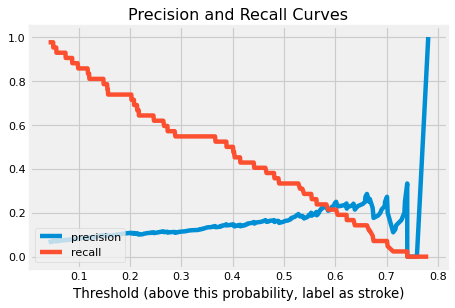

In [66]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lr_6x.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as stroke)');
plt.title('Precision and Recall Curves');

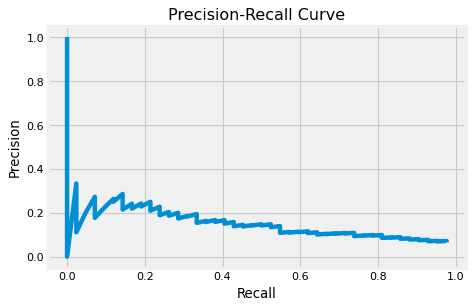

In [67]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [68]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, lr_6x.predict_proba(X_test)[:,1])

ROC AUC score =  0.8045086119554204


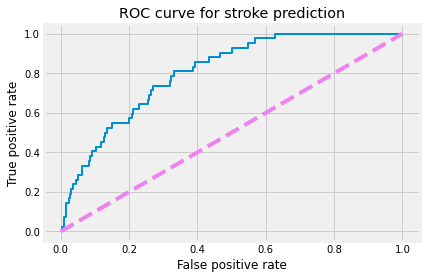

In [69]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for stroke prediction');
print("ROC AUC score = ", roc_auc_score(y_test, lr_6x.predict_proba(X_test)[:,1]))

## confusion matrix, threshold adjustment for model with best Logloss - Logistic Regression

In [18]:
lr_4x = LogisticRegression(C=100, class_weight={1 : 4, 0 : 1}, solver='liblinear') 
lr_4x.fit(X_train, y_train)

LogisticRegression(C=100, class_weight={0: 1, 1: 4}, solver='liblinear')

In [19]:
y_predict = lr_4x.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f}, Recall: {:6.4f}".format(precision_score(y_test, y_predict), recall_score(y_test, y_predict)))


Default threshold:
Precision: 0.1628, Recall: 0.1667


## confusion matrix, threshold adjustment for model with optimal AUC - Random Forest

In [71]:
rfc = RandomForestClassifier(n_jobs=-1 ,n_estimators=200, oob_score = True, class_weight={0:1,1:5}) 

param_grid = { 
    'n_estimators': [100, 200],
    'max_depth': [2,4,8],
    'max_features': ['auto', 'sqrt', 'log2']   
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='neg_log_loss')
CV_rfc.fit(X_tr_rs, y_tr_rs)
print(CV_rfc.best_params_)

print('Best score of neg_log_loss', CV_rfc.best_score_)

y_pred_rfc = CV_rfc.predict(X_test)

print("Random Forest Classifier with CV -")
print(f"Precision: {precision_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"Recall: {recall_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"F1: {f1_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"Log_loss: {log_loss(y_test, y_pred_rfc)}")
print(f"ROC AUC: {roc_auc_score(y_test, CV_rfc.predict_proba(X_test)[:,1])}")

{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
Best score of neg_log_loss -0.2684587134482855
Random Forest Classifier with CV -
Precision: 0.13385826771653545
Recall: 0.40476190476190477
F1: 0.20118343195266275
Log_loss: 4.748292025489068
ROC AUC: 0.7880699088145896


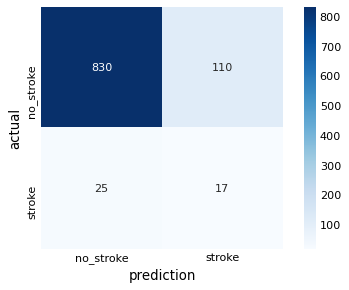

In [72]:
make_confusion_matrix(CV_rfc)

In [73]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(CV_rfc, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [74]:
# using the default threshold of 0.5, which is what vanilla predict does
y_predict = CV_rfc.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.1339,   Recall: 0.4048


In [75]:
# using the new threshold of 0.06
y_predict = (CV_rfc.predict_proba(X_test)[:,1] > 0.06)
print("Threshold of 0.06:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.06:
Precision: 0.0675,   Recall: 0.9286


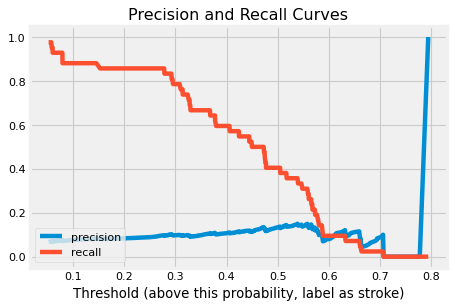

In [76]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, CV_rfc.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as stroke)');
plt.title('Precision and Recall Curves');

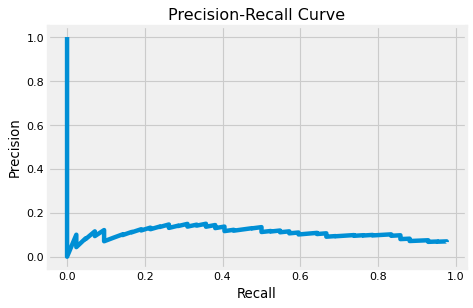

In [77]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [78]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, CV_rfc.predict_proba(X_test)[:,1])

ROC AUC score =  0.7880699088145896


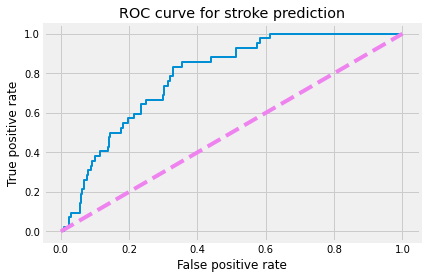

In [79]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for stroke prediction');
print("ROC AUC score = ", roc_auc_score(y_test, CV_rfc.predict_proba(X_test)[:,1]))

## confusion matrix, threshold adjustment for model with best Logloss - Random Forest

In [80]:
# class_weight={0:1,1:3}, best log_loss score
rfc = RandomForestClassifier(n_jobs=-1 ,n_estimators=200, oob_score = True, class_weight={0:1,1:3}) 

param_grid = { 
    'n_estimators': [100, 200],
    'max_depth': [2,4,8],
    'max_features': ['auto', 'sqrt', 'log2']   
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='neg_log_loss')
CV_rfc.fit(X_tr_rs, y_tr_rs)
print(CV_rfc.best_params_)

print('Best score of neg_log_loss', CV_rfc.best_score_)

y_pred_rfc = CV_rfc.predict(X_test)

print("Random Forest Classifier with CV -")
print(f"Precision: {precision_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"Recall: {recall_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"F1: {f1_score(y_test, y_pred_rfc, zero_division=0)}")
print(f"Log_loss: {log_loss(y_test, y_pred_rfc)}")
print(f"ROC AUC: {roc_auc_score(y_test, CV_rfc.predict_proba(X_test)[:,1])}")

{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}
Best score of neg_log_loss -0.23026202818770575
Random Forest Classifier with CV -
Precision: 0.12857142857142856
Recall: 0.21428571428571427
F1: 0.1607142857142857
Log_loss: 3.306205454750353
ROC AUC: 0.7792299898682877


## XGBoost model with optimal AUC 

In [81]:
gbm = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective="binary:logistic",  # Other options: https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8,
                       scale_pos_weight=3,
                       use_label_encoder=False
                      )
gbm.fit( 
        X_tr_rs, y_tr_rs, 
        eval_set=eval_set,
        eval_metric='auc',
        early_stopping_rounds=20,
       )

print('AUC : ', roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1]))
print('Log_loss: ', log_loss(y_test, gbm.predict(X_test)))
print('Precision : ', precision_score(y_test, gbm.predict(X_test)))
print('Recall : ', recall_score(y_test, gbm.predict(X_test)))
print('f1_score : ', f1_score(y_test, gbm.predict(X_test)))



[0]	validation_0-auc:0.85542	validation_1-auc:0.76355
[1]	validation_0-auc:0.86730	validation_1-auc:0.75580
[2]	validation_0-auc:0.86200	validation_1-auc:0.75147
[3]	validation_0-auc:0.87587	validation_1-auc:0.76887
[4]	validation_0-auc:0.87516	validation_1-auc:0.77150
[5]	validation_0-auc:0.87501	validation_1-auc:0.77157
[6]	validation_0-auc:0.87654	validation_1-auc:0.77024
[7]	validation_0-auc:0.88039	validation_1-auc:0.77359
[8]	validation_0-auc:0.88234	validation_1-auc:0.77463
[9]	validation_0-auc:0.88279	validation_1-auc:0.77375
[10]	validation_0-auc:0.88596	validation_1-auc:0.77712
[11]	validation_0-auc:0.88645	validation_1-auc:0.77991
[12]	validation_0-auc:0.88720	validation_1-auc:0.78257
[13]	validation_0-auc:0.88800	validation_1-auc:0.78685
[14]	validation_0-auc:0.88850	validation_1-auc:0.78991
[15]	validation_0-auc:0.88887	validation_1-auc:0.79089
[16]	validation_0-auc:0.89056	validation_1-auc:0.79357
[17]	validation_0-auc:0.89175	validation_1-auc:0.79497
[18]	validation_0-au

## XGBoost model with minimum logloss

In [82]:
gbm = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_delta_step = 1,
                       max_depth=4,
                       objective="binary:logistic",  # Other options: https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters
                       learning_rate=.3, 
                       subsample=1,
                       min_child_weight=2,
                       colsample_bytree=0.8,
                       use_label_encoder=False,
                       scale_pos_weight=2,
                       gamma=0
#                        num_boost_round=100
                      )
gbm.fit( 
        X_tr_rs, y_tr_rs, 
        eval_set=eval_set,
        eval_metric='auc',
        early_stopping_rounds=20
        #verbose=True #gives output log as below
       )

print('AUC : ', roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1]))
print('Log_loss: ', log_loss(y_test, gbm.predict(X_test)))
print('Precision : ', precision_score(y_test, gbm.predict(X_test)))
print('Recall : ', recall_score(y_test, gbm.predict(X_test)))
print('f1_score : ', f1_score(y_test, gbm.predict(X_test)))



[0]	validation_0-auc:0.80136	validation_1-auc:0.68341
[1]	validation_0-auc:0.83341	validation_1-auc:0.70091
[2]	validation_0-auc:0.87848	validation_1-auc:0.73694
[3]	validation_0-auc:0.90393	validation_1-auc:0.77004
[4]	validation_0-auc:0.91202	validation_1-auc:0.77333
[5]	validation_0-auc:0.91612	validation_1-auc:0.77292
[6]	validation_0-auc:0.91960	validation_1-auc:0.77798
[7]	validation_0-auc:0.92540	validation_1-auc:0.78766
[8]	validation_0-auc:0.93164	validation_1-auc:0.79433
[9]	validation_0-auc:0.93699	validation_1-auc:0.79184
[10]	validation_0-auc:0.93964	validation_1-auc:0.79572
[11]	validation_0-auc:0.94137	validation_1-auc:0.79799
[12]	validation_0-auc:0.94215	validation_1-auc:0.79825
[13]	validation_0-auc:0.94648	validation_1-auc:0.79904
[14]	validation_0-auc:0.94918	validation_1-auc:0.79967
[15]	validation_0-auc:0.94990	validation_1-auc:0.80122
[16]	validation_0-auc:0.95098	validation_1-auc:0.80101
[17]	validation_0-auc:0.95185	validation_1-auc:0.80223
[18]	validation_0-au